In [1]:
#                                      A Robust Cyber attack Detection Model: A Big Data Perspective 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [3]:
#Reading all files and combining it into a single file

In [4]:
LDAP = pd.read_csv('Ldap up.csv')
udplag = pd.read_csv('UDPLAG.csv',low_memory=False)
udp = pd.read_csv('udp modified.csv')
portmap = pd.read_csv('portmap modified.csv',low_memory=False)
syn= pd.read_csv('syn modified.csv',low_memory=False)
netbios=pd.read_csv('netbios modified.csv',low_memory=False)
data=pd.concat([LDAP,udplag,udp,portmap,syn,netbios],ignore_index=True)
data.to_csv('new_data.csv', index=False)

In [5]:
#Reading the data chunkwise as the dataset is very large

In [6]:
d=pd.read_csv('new_data.csv',chunksize=100000,low_memory=False)

In [7]:
for chunk in d:
    print(chunk.head(5))

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0               1                   2                        0   
1              48                   2                        0   
2               1                   2                        0   
3               1                   2                        0   
4               1                   2                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                          422                             0   
1                          530                             0   
2                          458                             0   
3                          458                             0   
4                          458                             0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                     211                     211                    211.0   
1                     265                     265             

In [8]:
import pandas as pd
file_path = 'new_data.csv'
chunksize = 100000
chunks = pd.read_csv(file_path, chunksize=chunksize)
first_chunk = next(chunks)
columns = first_chunk.columns
print("Columns of the dataset:", columns)

Columns of the dataset: Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
     

In [9]:
import pandas as pd
file_path = 'new_data.csv'
chunksize = 100000
chunks = pd.read_csv(file_path, chunksize=chunksize,low_memory=False)
total_rows = 0
for chunk in chunks:
    total_rows += len(chunk)
print("Total number of rows:", total_rows)

Total number of rows: 5065529


In [10]:
import pandas as pd
file_path = 'new_data.csv'
chunksize = 100000
chunks = pd.read_csv(file_path, chunksize=chunksize,low_memory=False)
value_counts = pd.Series(dtype=int)
for chunk in chunks:
    value_counts = value_counts.add(chunk[' Label'].value_counts(), fill_value=0)
print("Value counts for 'Label' column:")
print(value_counts)

Value counts for 'Label' column:
 Label
LDAP        841586.0
MSSQL        24392.0
NetBIOS    1251410.0
Portmap     186960.0
Syn        1624663.0
UDP        1134645.0
UDPLag        1873.0
dtype: float64


In [11]:
import pandas as pd
from sklearn.utils import resample

file_path = 'new_data.csv'
chunk_size = 10000
chunks = pd.read_csv(file_path, chunksize=chunk_size,low_memory=False)
downsampled_data = pd.DataFrame()

for chunk in chunks:
    class_counts = chunk[' Label'].value_counts()
    minority_class = class_counts.idxmin()

    # Upsample minority class and downsample majority classes
    downsampled_chunk = pd.DataFrame()

    # Iterate over each class in the chunk
    for label in class_counts.index:
        # Skip minority class
        if label == minority_class:
            continue

        majority_class_data = chunk[chunk[' Label'] == label]
        downsampled_majority_class = resample(majority_class_data, replace=False, n_samples=class_counts[minority_class], random_state=42)
        downsampled_chunk = pd.concat([downsampled_chunk, downsampled_majority_class])

    # Append minority class data to the downsampled chunk
    minority_class_data = chunk[chunk[' Label'] == minority_class]
    downsampled_chunk = pd.concat([downsampled_chunk, minority_class_data])

    # Append downsampled chunk to the downsampled data
    downsampled_data = pd.concat([downsampled_data, downsampled_chunk])

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=42)


In [12]:
downsampled_data.to_csv('downsampled_data.csv', index=False)

In [13]:
file_path = 'downsampled_data.csv'
chunksize = 100000
chunks = pd.read_csv(file_path, chunksize=chunksize,low_memory=False)
total_rows = 0
for chunk in chunks:
    total_rows += len(chunk)
print("Total number of rows:", total_rows)

Total number of rows: 5024630


In [14]:
import pandas as pd
file_path = 'downsampled_data.csv'
chunksize = 10000
chunks = pd.read_csv(file_path, chunksize=chunksize,low_memory=False)
value_counts = pd.Series(dtype=int)
for chunk in chunks:
    value_counts = value_counts.add(chunk[' Label'].value_counts(), fill_value=0)
print("Value counts for 'Label' column:")
print(value_counts)

Value counts for 'Label' column:
 Label
LDAP        837424.0
MSSQL        14404.0
NetBIOS    1251410.0
Portmap     173040.0
Syn        1619383.0
UDP        1127822.0
UDPLag        1147.0
dtype: float64


In [15]:
import pandas as pd

# Specify file paths
input_file_path = "downsampled_data.csv"
output_file_path = "nd_data.csv"
chunk_size = 10000

# Create an empty list to store processed chunks
processed_chunks = []

# Iterate over chunks of the dataset
for chunk in pd.read_csv(input_file_path, chunksize=chunk_size, low_memory=False):
    # Convert non-numeric values to NaN except for the last column label
    for column in chunk.columns[:-1]:
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
    # Replace NaN values with 0
    chunk = chunk.fillna(0)
    # Append the processed chunk to the list
    processed_chunks.append(chunk)

# Concatenate processed chunks into a single DataFrame
normalized_df = pd.concat(processed_chunks, ignore_index=True)

# Save the processed DataFrame to a CSV file
normalized_df.to_csv(output_file_path, index=False)




In [16]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Specify file paths
input_file_path = "nd_data.csv"
output_file_path = "calci.csv"
chunk_size = 10000

# Create an empty list to store processed chunks
processed_chunks = []

# Iterate over chunks of the dataset
for chunk in pd.read_csv(input_file_path, chunksize=chunk_size, low_memory=False):
    # Convert non-numeric values to NaN except for the last column label
    for column in chunk.columns[:-1]:
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
    # Replace NaN values with 0
    chunk = chunk.fillna(0)
    # Winsorize each column except for the last column label
    for column in chunk.columns[:-1]:
        chunk[column] = winsorize(chunk[column], limits=(0.05, 0.05))
    # Append the processed chunk to the list
    processed_chunks.append(chunk)

# Concatenate processed chunks into a single DataFrame
normalized_df = pd.concat(processed_chunks, ignore_index=True)

# Save the processed DataFrame to a CSV file
normalized_df.to_csv(output_file_path, index=False)


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Specify file paths
input_file_path = "calci.csv"
output_file_path = "normalized_downsampled_data.csv"
chunk_size = 10000

# Create an empty list to store processed chunks
processed_chunks = []

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Iterate over chunks of the dataset
for chunk in pd.read_csv(input_file_path, chunksize=chunk_size, low_memory=False):
    # Convert non-numeric values to NaN except for the last column label
    for column in chunk.columns[:-1]:
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
    # Replace NaN values with 0
    chunk = chunk.fillna(0)
    # Apply Min-Max scaling to each column except for the last column label
    for column in chunk.columns[:-1]:
        chunk[column] = scaler.fit_transform(chunk[[column]])
    # Append the processed chunk to the list
    processed_chunks.append(chunk)

# Concatenate processed chunks into a single DataFrame
normalized_df = pd.concat(processed_chunks, ignore_index=True)

# Save the processed DataFrame to a CSV file
normalized_df.to_csv(output_file_path, index=False)


In [18]:
dn=pd.read_csv("normalized_downsampled_data.csv",chunksize=100000,low_memory=False)


In [19]:
for chunk in dn:
    print(chunk.head(5))

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0        0.000000                 0.0                      0.0   
1        0.942468                 1.0                      0.0   
2        0.000204                 0.0                      0.0   
3        0.000395                 0.0                      1.0   
4        0.000000                 0.0                      0.0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                     0.152115                           0.0   
1                     0.708049                           0.0   
2                     0.269441                           0.0   
3                     0.000000                           1.0   
4                     0.257162                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                0.152115                0.152115                 0.152115   
1                0.263984                0.214870             

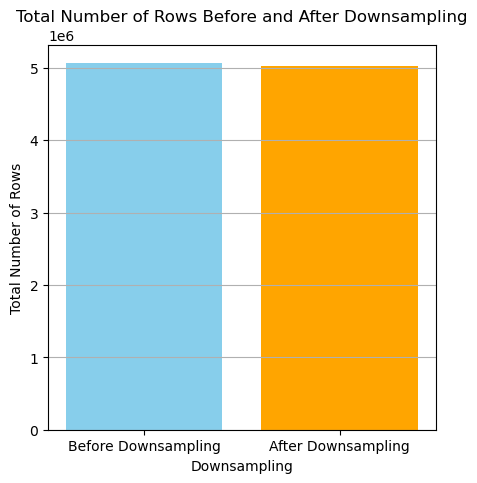

In [20]:
labels = ['Before Downsampling', 'After Downsampling']
counts = [5065529, 5024630]
plt.figure(figsize=(5, 5))
plt.bar(labels, counts, color=['skyblue', 'orange'])
plt.title('Total Number of Rows Before and After Downsampling')
plt.xlabel('Downsampling')
plt.ylabel('Total Number of Rows')
plt.grid(axis='y')
plt.show()

In [21]:
#Feature Extraction

In [9]:
import pandas as pd

file_path = "normalized_downsampled_data.csv"
chunk_size = 10000
mean_dict = {}

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    for column in chunk.columns[:-1]:
        # Convert column values to numeric type
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
        # Remove NaN values
        chunk[column].dropna(inplace=True)
        # Check if column is not empty
        if not chunk[column].empty:
            mean_val = chunk[column].mean()  # Calculate mean
            # Store the mean value in the dictionary
            if column in mean_dict:
                mean_dict[column].append(mean_val)
            else:
                mean_dict[column] = [mean_val]
        else:
            print(f"Warning: Column '{column}' is empty in the current chunk.")

# Calculate the average mean for each column across all chunks
for column, mean_values in mean_dict.items():
    average_mean = sum(mean_values) / len(mean_values)
    mean_dict[column] = average_mean

# Print mean values for all columns except the last one
print("Average mean for all columns:")
for column, mean_val in mean_dict.items():
    print(f"{column}: {mean_val}")



Average mean for all columns:
 Flow Duration: 0.11175514913212876
 Total Fwd Packets: 0.11909515842311147
 Total Backward Packets: 0.13479790372237416
Total Length of Fwd Packets: 0.3069258618243602
 Total Length of Bwd Packets: 0.13449096679820285
 Fwd Packet Length Max: 0.26858611027695256
 Fwd Packet Length Min: 0.2640953413121171
 Fwd Packet Length Mean: 0.26610433762940433
 Fwd Packet Length Std: 0.09926201700394593
Bwd Packet Length Max: 0.13448931007189405
 Bwd Packet Length Min: 0.13432460242146815
 Bwd Packet Length Mean: 0.1344889455921061
 Bwd Packet Length Std: 0.0
Flow Bytes/s: 0.21807325042014009
 Flow Packets/s: 0.5797466162722301
 Flow IAT Mean: 0.1357640943624464
 Flow IAT Std: 0.14785298681618222
 Flow IAT Max: 0.14938229544534398
 Flow IAT Min: 0.12122025062547673
Fwd IAT Total: 0.11193074956751359
 Fwd IAT Mean: 0.13571742964762634
 Fwd IAT Std: 0.14765139507519506
 Fwd IAT Max: 0.1492117906077386
 Fwd IAT Min: 0.1373817655466168
Bwd IAT Total: 0.09288804237211712
 

In [23]:
import pandas as pd
import math
file_path ="normalized_downsampled_data.csv"
chunk_size = 10000
overall_probability_distribution = {}
total_rows = 0
α = 0.5
for chunk in pd.read_csv(file_path, chunksize=chunk_size,low_memory=False):
    total_rows += len(chunk)

    # Calculate the probability distribution P(y) for each outcome y in the current chunk
    chunk_probability_distribution = chunk[' Label'].value_counts(normalize=True).to_dict()

    # Update the overall probability distribution
    for label, probability in chunk_probability_distribution.items():
        overall_probability_distribution[label] = overall_probability_distribution.get(label, 0) + probability

# Calculate improved entropy
improved_entropy = 1 - (1 - α) * sum((math.log(α) * math.log(probability))**2 for probability in overall_probability_distribution.values()) / total_rows

print("Improved entropy:", improved_entropy)

Improved entropy: 0.9999950216828354


In [24]:
import pandas as pd
from scipy.stats import skew

file_path ="normalized_downsampled_data.csv"
chunk_size = 10000
skewness_dict = {}

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    for column in chunk.columns[:-1]:
        # Convert column values to numeric type
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
        # Remove NaN values
        chunk[column].dropna(inplace=True)
        # Check if column is not empty
        if not chunk[column].empty:
            skew_val = skew(chunk[column])  # Calculate skewness
            # Store the skewness value in the dictionary
            if column in skewness_dict:
                skewness_dict[column].append(skew_val)
            else:
                skewness_dict[column] = [skew_val]
        else:
            print(f"Warning: Column '{column}' is empty in the current chunk.")

# Calculate the average skewness for each column across all chunks
for column, skewness_values in skewness_dict.items():
    average_skewness = sum(skewness_values) / len(skewness_values)
    skewness_dict[column] = average_skewness

# Print skewness values for all columns except the last one
print("Average skewness for all columns:")
for column, skewness_val in skewness_dict.items():
    print(f"{column}: {skewness_val}")



Average skewness for all columns:
 Flow Duration: 2.4560706604197406
 Total Fwd Packets: 2.3141463319127205
 Total Backward Packets: 2.1394521376717783
Total Length of Fwd Packets: 1.0861568973067741
 Total Length of Bwd Packets: 2.143315691966642
 Fwd Packet Length Max: 1.468280968312924
 Fwd Packet Length Min: 1.5028619406170773
 Fwd Packet Length Mean: 1.4883210714147657
 Fwd Packet Length Std: 2.602071070387647
Bwd Packet Length Max: 2.1433394494975477
 Bwd Packet Length Min: 2.1454158944264603
 Bwd Packet Length Mean: 2.1433440183831602
 Bwd Packet Length Std: nan
Flow Bytes/s: 1.6211976715437508
 Flow Packets/s: -0.30052850062228537
 Flow IAT Mean: 2.006766602291605
 Flow IAT Std: 1.948926412750719
 Flow IAT Max: 1.944398260445554
 Flow IAT Min: 2.5813087875684118
Fwd IAT Total: 2.452175741044048
 Fwd IAT Mean: 2.007374341627091
 Fwd IAT Std: 1.9503983553241524
 Fwd IAT Max: 1.9456053008833314
 Fwd IAT Min: 2.3218681821493687
Bwd IAT Total: 2.7587979097712263
 Bwd IAT Mean: 2.758

In [25]:
import pandas as pd
from scipy.stats import kurtosis

file_path = "normalized_downsampled_data.csv"
chunk_size = 10000
kurtosis_dict = {}

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    for column in chunk.columns[:-1]: 
        # Convert column values to numeric type
        chunk[column] = pd.to_numeric(chunk[column], errors='coerce')
        # Remove NaN values
        chunk[column].dropna(inplace=True)
        if not chunk[column].empty:  # Check if column is not empty after removing NaNs
            kurt = kurtosis(chunk[column])
            # Store the kurtosis value in the dictionary
            if column in kurtosis_dict:
                kurtosis_dict[column].append(kurt)
            else:
                kurtosis_dict[column] = [kurt]

# Calculate the average kurtosis for each column across all chunks
for column, kurtosis_values in kurtosis_dict.items():
    average_kurtosis = sum(kurtosis_values) / len(kurtosis_values)
    kurtosis_dict[column] = average_kurtosis

# Print kurtosis values for all columns except the last one
print("Average kurtosis for all columns:")
for column, kurtosis_val in kurtosis_dict.items():
    print(f"{column}: {kurtosis_val}")




Average kurtosis for all columns:
 Flow Duration: 4.64670946563011
 Total Fwd Packets: 3.8578707075753575
 Total Backward Packets: 2.5792385221812015
Total Length of Fwd Packets: -0.34587475061232753
 Total Length of Bwd Packets: 2.5956575456999706
 Fwd Packet Length Max: 0.6497691046960312
 Fwd Packet Length Min: 0.7130681491833
 Fwd Packet Length Mean: 0.6872858542413713
 Fwd Packet Length Std: 5.000315540546134
Bwd Packet Length Max: 2.595768644561027
 Bwd Packet Length Min: 2.604678440887579
 Bwd Packet Length Mean: 2.5957919098066107
 Bwd Packet Length Std: nan
Flow Bytes/s: 1.0206157771710997
 Flow Packets/s: -1.846473215899978
 Flow IAT Mean: 2.1340804257985813
 Flow IAT Std: 1.8095673043742704
 Flow IAT Max: 1.7876500411702356
 Flow IAT Min: 4.688395929774849
Fwd IAT Total: 4.621425137015638
 Fwd IAT Mean: 2.1352097380729287
 Fwd IAT Std: 1.8151556003353733
 Fwd IAT Max: 1.7913738879342709
 Fwd IAT Min: 3.4111669262822937
Bwd IAT Total: 6.329979202932406
 Bwd IAT Mean: 6.330026

In [ ]:
#ICA with reduced sample

In [4]:
import pandas as pd
from sklearn.utils import resample

file_path = 'normalized_downsampled_data.csv'
output_file_path = 'new_downsampled_data.csv'
chunk_size = 10000
total_samples = 300000

desired_classes = ['LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']

chunks = pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)
downsampled_data = pd.DataFrame()

# Initialize a dictionary to keep track of the number of samples for each class
class_counts = {label: 0 for label in desired_classes}

for chunk in chunks:
    # Iterate over each class in the desired_classes list
    for label in desired_classes:
        # If the desired number of samples for this class is already achieved, skip
        if class_counts[label] >= total_samples // len(desired_classes):
            continue
        
        # Extract data for the current class
        class_data = chunk[chunk[' Label'] == label]
        
        # Calculate how many samples to downsample for this class
        remaining_samples = total_samples // len(desired_classes) - class_counts[label]
        
        # If there are not enough samples in this chunk, adjust the remaining_samples
        if len(class_data) < remaining_samples:
            remaining_samples = len(class_data)
        
        # Downsample the class_data to match the remaining_samples
        downsampled_class_data = resample(class_data, replace=False, n_samples=remaining_samples, random_state=42)
        
        # Append the downsampled_class_data to downsampled_data
        downsampled_data = pd.concat([downsampled_data, downsampled_class_data])
        
        # Update the count for this class
        class_counts[label] += len(downsampled_class_data)

    # If the desired number of samples for all classes is achieved, break out of the loop
    if all(count >= total_samples // len(desired_classes) for count in class_counts.values()):
        break

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=42)

# Save the downsampled data to a CSV file
downsampled_data.to_csv(output_file_path, index=False)

# Display the final counts for each class
print("Final class counts:")
for label, count in class_counts.items():
    print(f"{label}: {count}")


Final class counts:
LDAP: 42857
MSSQL: 14404
NetBIOS: 42857
Portmap: 42857
Syn: 42857
UDP: 42857
UDPLag: 1147


In [5]:
import pandas as pd

file_path = 'new_downsampled_data.csv'
chunk_size = 10000

total_rows = 0

chunks = pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)
for chunk in chunks:
    total_rows += len(chunk)

print("Total rows count:", total_rows)


Total rows count: 229836


In [17]:
++++import pandas as pd
from sklearn.decomposition import FastICA

# Load the normalized dataset from the CSV file
normalized_data = pd.read_csv('new_downsampled_data.csv')

# Separate features (x) and output class (c)
features = normalized_data.iloc[:, :-1]  # Select all columns except the last one as features
output_class = normalized_data.iloc[:, -1]  # Select the last column as the output class

# Apply ICA to the features (excluding the last column)
ica = FastICA(n_components=40)  # Keep 40 independent components
ica_features = ica.fit_transform(features)

# Create a DataFrame with ICA features
ica_data = pd.DataFrame(data=ica_features)  # Use original column names for ICA features

# Add the output class as the last column
ica_data['Label'] = output_class

# Save the ICA features dataset to a CSV file
ica_data.to_csv("newica_data.csv", index=False)

# Print a message to confirm the file has been saved
print("ICA features dataset has been saved to 'newica_data.csv'")




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


ICA features dataset has been saved to 'newica_data.csv'


In [18]:
import pandas as pd
df_new = pd.read_csv("newica_data.csv")
print(df_new.head())

          0         1         2         3         4         5         6  \
0  0.000110  0.000171  0.000434  0.000061 -0.000014 -0.000390  0.000171   
1  0.000273  0.000967  0.000293  0.000837 -0.000275 -0.000485  0.000397   
2  0.000120 -0.000264  0.000858 -0.000221  0.000027 -0.000141  0.000020   
3  0.000072 -0.000028 -0.000370 -0.000054 -0.000004 -0.000241  0.000085   
4  0.000242 -0.001478  0.000357 -0.001108  0.000118  0.000217 -0.000272   

          7         8         9  ...        31        32        33        34  \
0 -0.000129 -0.000073 -0.000003  ... -0.000544 -0.000137  0.000228 -0.000076   
1 -0.000971  0.000044 -0.000734  ... -0.000830 -0.001043  0.000267 -0.000979   
2  0.000258 -0.000194 -0.000011  ...  0.006369  0.000261  0.000127  0.000233   
3  0.000024 -0.000097 -0.000022  ... -0.000847  0.000031  0.000156  0.000047   
4  0.001363 -0.000742 -0.000039  ... -0.000846  0.001427  0.000048  0.001182   

         35        36        37        38        39    Label  
0  0.

In [20]:
import pandas as pd

# Load the CSV file
rica_data = pd.read_csv("newica_data.csv")

# Create a mapping dictionary for label encoding
label_mapping = {'LDAP': 1, 'MSSQL': 2, 'NetBIOS': 3, 'Portmap': 4, 'Syn': 5, 'UDP': 6, 'UDPLag': 7}

# Replace label names with numbers
rica_data['Label'] = rica_data['Label'].replace(label_mapping)

# Save the modified DataFrame back to a CSV file
rica_data.to_csv("modified_rica_data.csv", index=False)

In [21]:
import pandas as pd
df_new = pd.read_csv("modified_rica_data.csv")
print(df_new.head())

          0         1         2         3         4         5         6  \
0  0.000110  0.000171  0.000434  0.000061 -0.000014 -0.000390  0.000171   
1  0.000273  0.000967  0.000293  0.000837 -0.000275 -0.000485  0.000397   
2  0.000120 -0.000264  0.000858 -0.000221  0.000027 -0.000141  0.000020   
3  0.000072 -0.000028 -0.000370 -0.000054 -0.000004 -0.000241  0.000085   
4  0.000242 -0.001478  0.000357 -0.001108  0.000118  0.000217 -0.000272   

          7         8         9  ...        31        32        33        34  \
0 -0.000129 -0.000073 -0.000003  ... -0.000544 -0.000137  0.000228 -0.000076   
1 -0.000971  0.000044 -0.000734  ... -0.000830 -0.001043  0.000267 -0.000979   
2  0.000258 -0.000194 -0.000011  ...  0.006369  0.000261  0.000127  0.000233   
3  0.000024 -0.000097 -0.000022  ... -0.000847  0.000031  0.000156  0.000047   
4  0.001363 -0.000742 -0.000039  ... -0.000846  0.001427  0.000048  0.001182   

         35        36        37        38        39  Label  
0  0.00

In [22]:
import pandas as pd

# Load the modified CSV file
modified_rica_data = pd.read_csv("modified_rica_data.csv")

# Print class counts in the "Label" column
class_counts = modified_rica_data['Label'].value_counts()
print("Class counts in the 'Label' column:")
print(class_counts)


Class counts in the 'Label' column:
Label
4    42857
6    42857
3    42857
5    42857
1    42857
2    14404
7     1147
Name: count, dtype: int64


In [23]:
import pandas as pd

# Load the modified CSV file
modified_rica_data = pd.read_csv("modified_rica_data.csv")

# Get the total number of rows
total_rows = modified_rica_data.shape[0]
print("Total number of rows:", total_rows)


Total number of rows: 229836


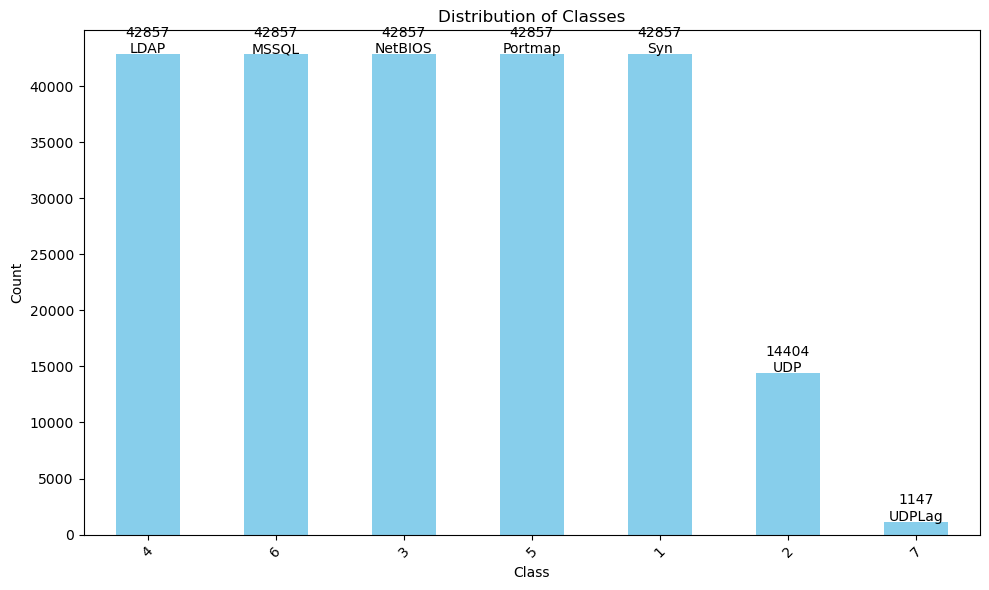

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified CSV file
modified_rica_data = pd.read_csv("modified_rica_data.csv")

# Create a mapping dictionary for label encoding
label_mapping = {'LDAP': 1, 'MSSQL': 2, 'NetBIOS': 3, 'Portmap': 4, 'Syn': 5, 'UDP': 6, 'UDPLag': 7}

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
class_counts = modified_rica_data['Label'].value_counts()
class_counts.plot(kind='bar', color='skyblue')

# Annotate the bars with class labels
for i, count in enumerate(class_counts):
    plt.text(i, count + 100, f"{count}\n{list(label_mapping.keys())[i]}", ha='center')

plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [22]:
!pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [23]:
!pip install --upgrade keras


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.1 MB 573.4 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 581.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.1 MB 981.9 kB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.1 MB 981.9 kB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 948.8 kB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 948.8 kB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 948.8 kB/s eta 0:00:01
   ----------- ----------------

In [ ]:
#LSTM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load the modified CSV file
modified_rica_data = pd.read_csv("modified_rica_data.csv")

# Extract features (input) and labels (output)
X = modified_rica_data.drop(columns=['Label'])  # Features (input)
y = modified_rica_data['Label']  # Labels (output)

# Convert labels to categorical one-hot encoding
y = pd.get_dummies(y)

# Convert features and labels to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (183868, 40)
Shape of X_test: (45968, 40)
Shape of y_train: (183868, 7)
Shape of y_test: (45968, 7)


In [2]:
import numpy as np

# Reshape the input data to three-dimensional arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the reshaped input data
print("Shape of X_train_reshaped:", X_train_reshaped.shape)
print("Shape of X_test_reshaped:", X_test_reshaped.shape)


Shape of X_train_reshaped: (183868, 40, 1)
Shape of X_test_reshaped: (45968, 40, 1)


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [15]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(units=7, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_reshaped)


C:\Users\Ahin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 118s 20ms/step - accuracy: 0.1874 - loss: 1.7713 - val_accuracy: 0.2930 - val_loss: 1.6419
Epoch 2/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 113s 20ms/step - accuracy: 0.4364 - loss: 1.2970 - val_accuracy: 0.6575 - val_loss: 0.7893
Epoch 3/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 111s 19ms/step - accuracy: 0.6805 - loss: 0.7384 - val_accuracy: 0.7168 - val_loss: 0.6186
Epoch 4/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 110s 19ms/step - accuracy: 0.7176 - loss: 0.6057 - val_accuracy: 0.7537 - val_loss: 0.5038
Epoch 5/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 118s 21ms/step - accuracy: 0.7638 - loss: 0.4804 - val_accuracy: 0.6447 - val_loss: 0.8670
Epoch 6/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 120s 21ms/step - accuracy: 0.7710 - loss: 0.4569 - val_accuracy: 0.7889 - val_loss: 0.3906
Epoch 7/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 114s 20ms/step - accuracy: 0.7869 - loss: 0.3984 - val_accuracy: 0.8019 - val_loss: 0.3565
Epoch 8/10
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 112s 19ms/step - accuracy: 

In [ ]:
#LSTM with Deep Max Out

In [11]:
import tensorflow as tf
from keras.layers import Dense, LSTM, Concatenate, Input, Lambda, BatchNormalization, Flatten, Reshape
from keras.models import Model
from sklearn.utils import shuffle

# Define the custom Maxout activation function
def maxout_activation_function(inputs, units):
    output = tf.reduce_max(inputs, axis=-1)
    return output

# Shuffle the training data
X_train_reshaped, y_train = shuffle(X_train_reshaped, y_train)

# Define input layers
lstm_input = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Define LSTM layer
lstm_output = LSTM(units=50, return_sequences=True)(lstm_input)

# Apply Deep Maxout activation function to the LSTM output
maxout_output = LSTM(units=40, return_sequences=True)(lstm_output)
maxout_output = LSTM(units=20, return_sequences=True)(maxout_output)
maxout_output = Lambda(lambda x: maxout_activation_function(x, units=10))(maxout_output)

# Batch normalization applied to the LSTM output
batch_norm_output = BatchNormalization()(lstm_output)

# Reshape maxout_output to match the shape of batch_norm_output
reshaped_maxout_output = Reshape(target_shape=(40, 1))(maxout_output)

# Concatenate LSTM and Deep Maxout outputs
combined_output = Concatenate(axis=-1)([batch_norm_output, reshaped_maxout_output])

# Flatten the combined_output
flatten = Flatten()(combined_output)

# Output layer
output_layer = Dense(units=7, activation='softmax')(flatten)

# Create the combined model
combined_model = Model(inputs=lstm_input, outputs=output_layer)

# Set the learning rate
learning_rate = 0.001  

# Compile the combined model with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the combined model
history = combined_model.fit(X_train_reshaped, y_train, epochs=18, batch_size=batch_size, validation_split=0.2)

# Evaluate the combined model
loss, accuracy = combined_model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions using the combined model
predictions = combined_model.predict(X_test_reshaped)


Epoch 1/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 252s 52ms/step - accuracy: 0.6042 - loss: 1.0258 - val_accuracy: 0.7820 - val_loss: 0.4703
Epoch 2/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 1050s 228ms/step - accuracy: 0.7946 - loss: 0.4477 - val_accuracy: 0.7947 - val_loss: 0.4316
Epoch 3/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 235s 51ms/step - accuracy: 0.7982 - loss: 0.3882 - val_accuracy: 0.8062 - val_loss: 0.3763
Epoch 4/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 229s 50ms/step - accuracy: 0.8043 - loss: 0.3725 - val_accuracy: 0.7901 - val_loss: 0.3810
Epoch 5/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 233s 51ms/step - accuracy: 0.8033 - loss: 0.3708 - val_accuracy: 0.5381 - val_loss: 0.9931
Epoch 6/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 521s 113ms/step - accuracy: 0.8043 - loss: 0.3691 - val_accuracy: 0.5787 - val_loss: 1.1448
Epoch 7/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 142s 31ms/step - accuracy: 0.8063 - loss: 0.3612 - val_accuracy: 0.7692 - val_loss: 0.4334
Epoch 8/18
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 143s 31ms/step - accurac

In [18]:
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
# Print the shapes of the reshaped input data
print("Shape of X_train_reshaped:", X_train_reshaped.shape)
print("Shape of X_test_reshaped:", X_test_reshaped.shape)

Shape of X_train: (183868, 40)
Shape of X_test: (45968, 40)
Shape of y_train: (183868, 7)
Shape of y_test: (45968, 7)
Shape of X_train_reshaped: (183868, 40, 1)
Shape of X_test_reshaped: (45968, 40, 1)


In [ ]:
#Seagull Optimization Algorithm 

In [14]:
import numpy as np
import math
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report

class solution:
    def __init__(self):
        self.bestIndividual = None
def model_score(x_train, y_train, x_test, y_test, classes = 'multi'):
    
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    model = DecisionTreeClassifier(random_state = 101)
    #print(type(model))
    model.fit(x_train,y_train)
    
    test_predictions = model.predict(x_test)
    if classes == 'multi':
        return f1_score(y_test, test_predictions, average = 'macro')
    else:
        return f1_score(y_test, test_predictions)
        
def obj_func(pos_array,X_train,y_train,X_test, y_test, classes):
    alpha = 0.6
    feature_array = np.zeros_like(pos_array)
    for i in range(len(pos_array)):
        #print(1/(1+math.exp(-pos_array[i])))
        feature_array[i] = 1/(1+math.exp(-pos_array[i]))
    feature_array = [round(i) for i in feature_array]
    feature_index = [i for i in range(len(feature_array)) if feature_array[i] > 0]
    #print(len(feature_index))
    if (len(feature_index)==0):
        return [0,0]
    f1_score = model_score(X_train, y_train, X_test, y_test, classes = classes)
    fitness_score = alpha*f1_score + (1-alpha)*(X_train.shape[1]-len(feature_index))/X_train.shape[1]
    return [fitness_score,f1_score]

def SOA(X_train, y_train, X_test, y_test, objf, classes='multi', lb=-100,ub=100,
        SearchAgents_no=100, Max_iter=20):

    dim = X_train.shape[1]
    Leader_pos = np.zeros(dim)
    Leader_score = 0
    Leader_f1 = 0

    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0, 1, SearchAgents_no) * (ub - lb) + lb

    convergence_curve = np.zeros(Max_iter)
    s = solution()

    t = 0
    C_f = 2.0  # fc
    while t < Max_iter:
        for i in range(0, SearchAgents_no):
            for j in range(dim):
                Positions[i, j] = np.clip(Positions[i, j], lb, ub)

            fitness, f1score = objf(Positions[i, :], X_train, y_train, X_test, y_test, classes=classes)

            if fitness > Leader_score:
                Leader_score = fitness
                Leader_pos = Positions[i, :].copy()
                Leader_f1 = f1score

        for i in range(0, SearchAgents_no):
            A = C_f - t * (C_f / Max_iter)  # A=fc−(x×(fc/Maxiteration))
            B = 2 * A * A * (random.uniform(0, 1))  # B=2×A2×rd

            C_sp = A * Leader_pos
            M_sp = B * (fitness - Leader_pos)
            D_sp = C_sp + M_sp

            r = np.exp(np.random.uniform(0, 2 * np.pi))
            temp = r * r * r * (np.sin(np.random.uniform(0, 2 * np.pi))) * (
                np.cos(np.random.uniform(0, 2 * np.pi))) * (np.random.uniform(0, 2 * np.pi))

            Positions[i, :] = (D_sp * temp) + fitness

        convergence_curve[t] = Leader_score
        t = t + 1

    feature_array = np.zeros_like(Leader_pos)
    for i in range(len(Leader_pos)):
        feature_array[i] = 1 / (1 + math.exp(-Leader_pos[i]))
    feature_array = [round(i) for i in feature_array]
    feature_index = [i for i in range(len(feature_array)) if feature_array[i] > 0]

    s.convergence = convergence_curve
    s.optimizer = "SOA"
    s.objfname = objf.__name__
    s.bestfitness = Leader_score
    s.bestf1 = Leader_f1
    s.bestIndividual = feature_index
    return s


sol = SOA(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, objf=obj_func, Max_iter=20)
print(sol.bestIndividual)

indices = sol.bestIndividual
print(len(sol.bestIndividual))

X_train_SOA = X_train[:, indices]
X_test_SOA = X_test[:, indices]

np.save("X_train_SOAa.npy", X_train_SOA)
np.save("Y_train_SOAa.npy", y_train)
np.save("X_test_SOAa.npy", X_test_SOA)
np.save("Y_test_SOAa.npy", y_test)

[3, 4, 5, 9, 16, 30, 34, 35]
8


In [1]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
learning_rate = 0.01
import numpy as np

X_train_SOA = np.load("X_train_SOAa.npy")
y_train = np.load("Y_train_SOAa.npy")
X_test_SOA = np.load("X_test_SOAa.npy")
y_test = np.load("Y_test_SOAa.npy")

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_SOA.shape[1], 1)))
model.add(Dense(units=7, activation='softmax')) 

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_SOA, y_train, epochs=800, batch_size=100, validation_data=(X_test_SOA, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_SOA, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_SOA)


C:\Users\Ahin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1477 - loss: 1.9465 - val_accuracy: 0.1307 - val_loss: 1.9446
Epoch 2/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1530 - loss: 1.9373 - val_accuracy: 0.2306 - val_loss: 1.8230
Epoch 3/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3260 - loss: 1.6871 - val_accuracy: 0.5049 - val_loss: 1.4379
Epoch 4/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5139 - loss: 1.3895 - val_accuracy: 0.5867 - val_loss: 1.2353
Epoch 5/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5823 - loss: 1.2126 - val_accuracy: 0.5764 - val_loss: 1.1521
Epoch 6/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6064 - loss: 1.0908 - val_accuracy: 0.6238 - val_loss: 0.9715
Epoch 7/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6303 - loss: 1.0040 - val_accuracy: 0.6274 - val_loss: 0.9217
Epoch 8/800
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6513 - loss: 0.9215 - val_accuracy: 0.6881

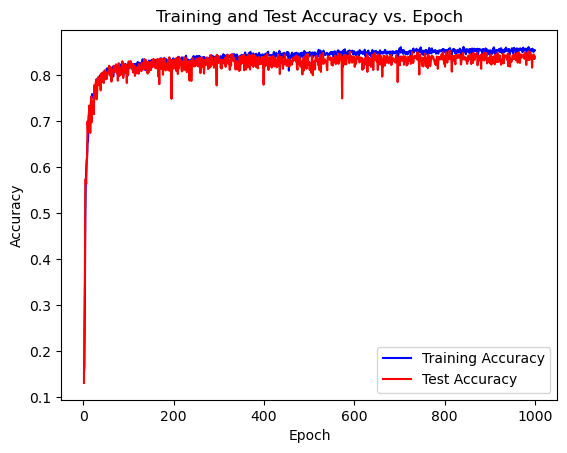

In [3]:
import matplotlib.pyplot as plt

# Get the accuracy values for training and test data
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the accuracy vs. epoch
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
import numpy as np
X_train_SOA = np.load("X_train_SOAa.npy")
y_train = np.load("Y_train_SOAa.npy")
X_test_SOA = np.load("X_test_SOAa.npy")
y_test = np.load("Y_test_SOAa.npy")

In [23]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
learning_rate = 0.01
import numpy as np

X_train_SOA = np.load("X_train_SOAa.npy")
y_train = np.load("Y_train_SOAa.npy")
X_test_SOA = np.load("X_test_SOAa.npy")
y_test = np.load("Y_test_SOAa.npy")

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_SOA.shape[1], 1)))
model.add(Dense(units=7, activation='softmax')) 

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_SOA, y_train, epochs=1000, batch_size=100, validation_data=(X_test_SOA, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_SOA, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_SOA)


Epoch 1/1000


C:\Users\Ahin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1483 - loss: 1.9432 - val_accuracy: 0.1513 - val_loss: 1.9428
Epoch 2/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1509 - loss: 1.9416 - val_accuracy: 0.1369 - val_loss: 1.9245
Epoch 3/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2494 - loss: 1.8189 - val_accuracy: 0.2790 - val_loss: 1.6479
Epoch 4/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4075 - loss: 1.5421 - val_accuracy: 0.4683 - val_loss: 1.4643
Epoch 5/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5464 - loss: 1.2981 - val_accuracy: 0.5594 - val_loss: 1.1817
Epoch 6/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5801 - loss: 1.1772 - val_accuracy: 0.5960 - val_loss: 1.1066
Epoch 7/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6139 - loss: 1.0617 - val_accuracy: 0.6052 - val_loss: 1.0098
Epoch 8/1000
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6271 - loss: 0.9818 - val_accuracy: 0.6222 - val_l

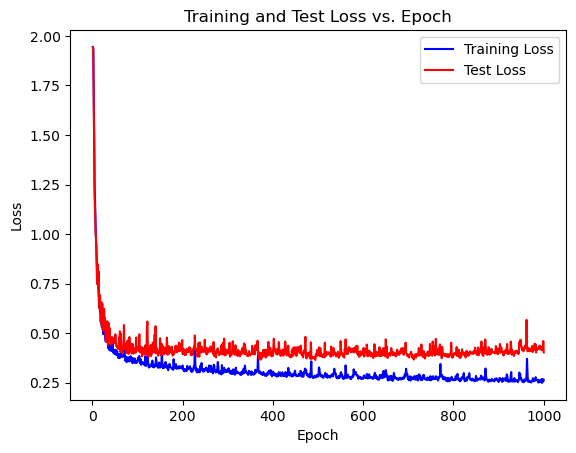

In [24]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the loss vs. epoch
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title('Training and Test Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Define the class names
class_names = ['LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']

# Map numerical labels to class names
y_true_class_names = [class_names[label] for label in y_true_labels]
y_pred_class_names = [class_names[label] for label in y_pred_labels]

# Generate classification report
report = classification_report(y_true_class_names, y_pred_class_names)
print(report)


              precision    recall  f1-score   support

        LDAP       0.96      0.99      0.98       255
       MSSQL       0.95      0.89      0.92       303
     NetBIOS       0.54      0.86      0.66       285
     Portmap       0.69      0.28      0.39       294
         Syn       0.99      1.00      0.99       272
         UDP       0.91      0.91      0.91       292
      UDPLag       0.91      0.98      0.94       242

    accuracy                           0.83      1943
   macro avg       0.85      0.84      0.83      1943
weighted avg       0.85      0.83      0.82      1943

